In [1]:
!pip install -r requirements.txt

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.4/436.4 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.6/175.6 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.7/739.7 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.5/3

In [44]:
import torch
import torch.nn as nn
import numpy as np

from transformer_lens import HookedTransformer
from transformers import GPT2Tokenizer, AdamW

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [6]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
# Load the tokenizer and model
model_name = 'gpt2-medium'  # or 'gpt2' if you used the smaller model
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token

# Initialize the base model
base_model = HookedTransformer.from_pretrained(model_name)
base_model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:90: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loaded pretrained model gpt2-medium into HookedTransformer
Moving model to device:  cpu


HookedTransformer(
  (embed): Embed()
  (hook_embed): HookPoint()
  (pos_embed): PosEmbed()
  (hook_pos_embed): HookPoint()
  (blocks): ModuleList(
    (0-23): 24 x TransformerBlock(
      (ln1): LayerNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (ln2): LayerNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (attn): Attention(
        (hook_k): HookPoint()
        (hook_q): HookPoint()
        (hook_v): HookPoint()
        (hook_z): HookPoint()
        (hook_attn_scores): HookPoint()
        (hook_pattern): HookPoint()
        (hook_result): HookPoint()
      )
      (mlp): MLP(
        (hook_pre): HookPoint()
        (hook_post): HookPoint()
      )
      (hook_attn_in): HookPoint()
      (hook_q_input): HookPoint()
      (hook_k_input): HookPoint()
      (hook_v_input): HookPoint()
      (hook_mlp_in): HookPoint()
      (hook_attn_out): HookPoint()
      (hook_mlp_out): HookPoint()
      (h

In [8]:
# Define the classification model
class ToxicCommentClassifier(nn.Module):
    def __init__(self, base_model, n_classes):
        super(ToxicCommentClassifier, self).__init__()
        self.base_model = base_model  # HookedTransformer model
        self.dropout = nn.Dropout(p=0.3)
        self.out = nn.Linear(base_model.cfg.d_model, n_classes)

        # Freeze GPT-2 parameters
        for param in self.base_model.parameters():
            param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        # Get outputs and cache from the base model
        output = self.base_model.run_with_cache(input_ids, attention_mask=attention_mask)
        # Access the cache to get the residual stream after the last transformer block
        if isinstance(self.base_model.cfg.n_layers, int):
            last_layer = self.base_model.cfg.n_layers - 1
        else:
            last_layer = len(self.base_model.cfg.n_layers) - 1
        last_hidden_state = output[1][f'blocks.{last_layer}.hook_resid_post']
        # Pool the outputs (mean pooling)
        pooled_output = torch.mean(last_hidden_state, dim=1)
        # Apply dropout and classification layer
        output = self.dropout(pooled_output)
        logits = self.out(output)
        return logits

# Create the model instance
model = ToxicCommentClassifier(base_model=base_model, n_classes=1)
model = model.to(device)

In [ ]:
# Load the trained model weights
model.load_state_dict(torch.load('best_model_state.bin', map_location=device))

<ipython-input-10-1394886806b4>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_state_3.3_final.bin', map_location=device))


<All keys matched successfully>

In [19]:
# Extract the weight vector w (w_toxic in reference paper) from the classification head
# The weight is of shape (1, d_model), we squeeze to get shape (d_model,)
w = model.out.weight.data.squeeze(0)  # Shape: [d_model]
# Print the shape of w
print("Shape of w:", w.shape)  # Should be [d_model]

Shape of w: torch.Size([1024])


In [20]:
# List to store all v vectors and their corresponding layer and column indices
v_vectors = []
indices = []

# Number of layers in the GPT-2 model
num_layers = model.base_model.cfg.n_layers

# For each MLP layer, extract the W_out matrix
# In the loop, print the shape of W_out and v
for layer_idx in range(num_layers):
    mlp = model.base_model.blocks[layer_idx].mlp

    # Get W_out weight matrix
    W_out = mlp.W_out

    print(f"Layer {layer_idx} W_out shape: {W_out.shape}")

    # Collect v vectors and their indices
    for row_idx in range(W_out.shape[0]):  # Iterate over hidden_size
        v = W_out[row_idx, :]  # Shape: [d_model] = [1024]
        v_vectors.append(v)
        indices.append((layer_idx, row_idx))

Layer 0 W_out shape: torch.Size([4096, 1024])
Layer 1 W_out shape: torch.Size([4096, 1024])
Layer 2 W_out shape: torch.Size([4096, 1024])
Layer 3 W_out shape: torch.Size([4096, 1024])
Layer 4 W_out shape: torch.Size([4096, 1024])
Layer 5 W_out shape: torch.Size([4096, 1024])
Layer 6 W_out shape: torch.Size([4096, 1024])
Layer 7 W_out shape: torch.Size([4096, 1024])
Layer 8 W_out shape: torch.Size([4096, 1024])
Layer 9 W_out shape: torch.Size([4096, 1024])
Layer 10 W_out shape: torch.Size([4096, 1024])
Layer 11 W_out shape: torch.Size([4096, 1024])
Layer 12 W_out shape: torch.Size([4096, 1024])
Layer 13 W_out shape: torch.Size([4096, 1024])
Layer 14 W_out shape: torch.Size([4096, 1024])
Layer 15 W_out shape: torch.Size([4096, 1024])
Layer 16 W_out shape: torch.Size([4096, 1024])
Layer 17 W_out shape: torch.Size([4096, 1024])
Layer 18 W_out shape: torch.Size([4096, 1024])
Layer 19 W_out shape: torch.Size([4096, 1024])
Layer 20 W_out shape: torch.Size([4096, 1024])
Layer 21 W_out shape: t

In [21]:
# Convert the list of v vectors to a tensor
v_vectors_tensor = torch.stack(v_vectors)  # Shape: [total_columns, d_model]

# Normalize w and v vectors
w_norm = w / w.norm()  # Shape: [d_model]

v_vectors_norm = v_vectors_tensor / v_vectors_tensor.norm(dim=1, keepdim=True)  # Shape: [total_columns, d_model]

# Compute cosine similarities
cosine_similarities = torch.matmul(v_vectors_norm, w_norm)  # Shape: [total_columns]

# Move to CPU for sorting
cosine_similarities = cosine_similarities.cpu().numpy()

In [22]:
# Confirm shapes
print("Shape of v_vectors_norm:", v_vectors_norm.shape)
print("Shape of w_norm:", w_norm.shape)

Shape of v_vectors_norm: torch.Size([98304, 1024])
Shape of w_norm: torch.Size([1024])


In [23]:
N = 128 # Number of top vectors to extract

# Get the indices of the top N similarities
top_n_indices = np.argsort(cosine_similarities)[-N:][::-1]  # Indices of top N similarities

# Collect the top N vectors and their information
top_n_info = []
for idx in top_n_indices:
    sim = cosine_similarities[idx]
    layer_idx, col_idx = indices[idx]
    v_vector = v_vectors_tensor[idx].cpu().numpy()
    top_n_info.append({
        'layer': layer_idx,
        'column': col_idx,
        'similarity': sim,
        'v_vector': v_vector
    })

In [24]:
# Print the top N vectors information
for i, info in enumerate(top_n_info):
    print(f"Rank {i+1}:")
    print(f"  Layer Index: {info['layer']}")
    print(f"  Column Index: {info['column']}")
    print(f"  Cosine Similarity: {info['similarity']:.6f}")
    # Optionally, you can print or analyze the v_vector itself
    print(f"  v_vector: {info['v_vector']}")
    print()

Rank 1:
  Layer Index: 19
  Column Index: 770
  Cosine Similarity: 0.232888
  v_vector: [-0.08046717 -0.03044933  0.34587166 ...  0.13052279 -0.28202492
  0.10353191]

Rank 2:
  Layer Index: 18
  Column Index: 2669
  Cosine Similarity: 0.190135
  v_vector: [-0.06328271  0.14037909  0.05431195 ... -0.03909126  0.0764319
 -0.09267163]

Rank 3:
  Layer Index: 16
  Column Index: 255
  Cosine Similarity: 0.189711
  v_vector: [-0.09900736 -0.06675714  0.06302371 ... -0.13025934 -0.09925494
  0.06845882]

Rank 4:
  Layer Index: 19
  Column Index: 3341
  Cosine Similarity: 0.175189
  v_vector: [-0.28576428  0.18430258  0.1868964  ...  0.00985834  0.1084169
 -0.2013789 ]

Rank 5:
  Layer Index: 12
  Column Index: 882
  Cosine Similarity: 0.163188
  v_vector: [ 0.07182232 -0.03417168  0.23156047 ...  0.15623218 -0.06077047
  0.01722828]

Rank 6:
  Layer Index: 19
  Column Index: 1438
  Cosine Similarity: 0.158655
  v_vector: [ 0.10908271 -0.00783193  0.07460098 ...  0.13973917 -0.04822753
 -0.14

In [27]:
## Projection into Vocabulary Space

# Access the unembedding matrix W_U from the base GPT-2 model
# W_U maps from the hidden dimension (d_model) to the vocabulary size
W_U = model.base_model.W_U  # Shape: [d_model, vocab_size]

# We need to transpose W_U to get shape [vocab_size, d_model]
W_U_T = W_U.t()  # Shape: [vocab_size, d_model]

# Move W_U_T to the same device as the model
device = next(model.parameters()).device
W_U_T = W_U_T.to(device)

# Number of top value vectors to inspect
top_k = 7

print(f"Inspecting top {top_k} value vectors and their promoted tokens:\n")

for i in range(top_k):
    info = top_n_info[i]
    layer_idx = info['layer']
    col_idx = info['column']
    v_vector = info['v_vector']  # Numpy array of shape [d_model]

    # Convert v_vector to a tensor and move it to the correct device
    v_tensor = torch.tensor(v_vector, device=device, dtype=W_U_T.dtype)

    # Project v_vector onto the vocabulary space
    # Compute scores: scores = W_U_T @ v_vector  # Shape: [vocab_size]
    scores = torch.matmul(W_U_T, v_tensor)  # Shape: [vocab_size]

    # Get the top 5 tokens
    topk_values, topk_indices = torch.topk(scores, k=5)

    # Map token IDs to tokens
    tokens = [tokenizer.decode([idx.item()]) for idx in topk_indices]

    # Print the results
    print(f"Value Vector {i+1}: Layer {layer_idx}, Column {col_idx}")
    for rank, (token_id, token, score) in enumerate(zip(topk_indices, tokens, topk_values), 1):
        print(f"  Rank {rank}: Token ID: {token_id.item()}, Token: '{token}', Score: {score.item():.4f}")
    print()

Inspecting top 7 value vectors and their promoted tokens:

Value Vector 1: Layer 19, Column 770
  Rank 1: Token ID: 7510, Token: ' shit', Score: 5.6296
  Rank 2: Token ID: 840, Token: ' ass', Score: 5.2609
  Rank 3: Token ID: 18824, Token: ' crap', Score: 5.0376
  Rank 4: Token ID: 50201, Token: ' asses', Score: 4.9517
  Rank 5: Token ID: 5089, Token: ' fuck', Score: 4.9283

Value Vector 2: Layer 18, Column 2669
  Rank 1: Token ID: 25419, Token: ' degener', Score: 3.9135
  Rank 2: Token ID: 48978, Token: ' whining', Score: 3.9050
  Rank 3: Token ID: 35838, Token: ' idiots', Score: 3.6103
  Rank 4: Token ID: 8531, Token: ' stupid', Score: 3.6080
  Rank 5: Token ID: 27590, Token: ' smug', Score: 3.6002

Value Vector 3: Layer 16, Column 255
  Rank 1: Token ID: 27690, Token: ' disgrace', Score: 5.2128
  Rank 2: Token ID: 34078, Token: ' shameful', Score: 5.1772
  Rank 3: Token ID: 26769, Token: ' coward', Score: 5.1183
  Rank 4: Token ID: 18010, Token: ' unacceptable', Score: 4.9443
  Rank

In [28]:
## SVD Analysis

# Stack the v_vectors into a matrix V of shape [N, d_model]
V = np.stack([info['v_vector'] for info in top_n_info])  # Shape: [N, d_model]

In [29]:
# Centering the data (ensures that the SVD captures variance around the mean)

# Compute the mean vector
mean_vector = np.mean(V, axis=0)  # Shape: [d_model]

# Center the data
V_centered = V - mean_vector  # Shape: [N, d_model]

In [30]:
# Perform SVD on the centered data
# V_centered = U * Σ * VT
U, S, VT = np.linalg.svd(V_centered, full_matrices=False)

In [31]:
# Extract the basis vectors

# Transpose VT to get V (right singular vectors) of shape [d_model, N]
V_singular_vectors = VT.T  # Shape: [d_model, N]

# The columns of V_singular_vectors are the basis vectors
# You can select the top k basis vectors (e.g., k=3)
k = 3
basis_vectors = V_singular_vectors[:, :k]  # Shape: [d_model, k]

In [36]:
# The magnitude of the singular values indicates how much variance is captured by each basis vector
# Analyze the singular values
print("Singular values:", S[:k])

Singular values: [7.0115466 6.8991647 6.225186 ]


In [37]:
# Project w onto the basis vectors
w_numpy = w.cpu().numpy()
coefficients_w = np.dot(w_numpy - mean_vector, basis_vectors)
print("Projection coefficients of w onto the basis vectors:", coefficients_w)

Projection coefficients of w onto the basis vectors: [ 0.22968382 -0.06861717 -0.04475369]


In [39]:
## Basis vector Projection into Vocabulary Space

# basis_vectors: numpy array of shape [d_model, k], where k is the number of basis vectors
# Let's convert it to a PyTorch tensor
basis_vectors_tensor = torch.tensor(basis_vectors, dtype=W_U.dtype, device=W_U.device)  # Shape: [d_model, k]

bscores = torch.matmul(W_U_T, basis_vectors_tensor)  # Shape: [vocab_size, k]

for i in range(k):
    # Get the scores for the i-th basis vector
    basis_vector_scores = bscores[:, i]  # Shape: [vocab_size]

    # Get the top 5 tokens
    topk_values, topk_indices = torch.topk(basis_vector_scores, k=5)

    # Decode the token IDs to tokens
    tokens = [tokenizer.decode([idx.item()]) for idx in topk_indices]

    # Print the results
    print(f"Basis Vector {i+1}:")
    for rank, (token_id, token, score) in enumerate(zip(topk_indices, tokens, topk_values), 1):
        print(f"  Rank {rank}: Token ID: {token_id.item()}, Token: '{token}', Score: {score.item():.4f}")
    print()

Basis Vector 1:
  Rank 1: Token ID: 38693, Token: ' Beir', Score: 0.7817
  Rank 2: Token ID: 41383, Token: 'assetsadobe', Score: 0.7472
  Rank 3: Token ID: 36901, Token: ' Reflect', Score: 0.7449
  Rank 4: Token ID: 30227, Token: 'rieve', Score: 0.7076
  Rank 5: Token ID: 24401, Token: 'ARA', Score: 0.7021

Basis Vector 2:
  Rank 1: Token ID: 37323, Token: ' fools', Score: 0.9092
  Rank 2: Token ID: 28858, Token: ' cynical', Score: 0.8613
  Rank 3: Token ID: 35838, Token: ' idiots', Score: 0.8264
  Rank 4: Token ID: 8531, Token: ' stupid', Score: 0.8157
  Rank 5: Token ID: 31644, Token: ' goof', Score: 0.8122

Basis Vector 3:
  Rank 1: Token ID: 3239, Token: 'ovember', Score: 0.5930
  Rank 2: Token ID: 49159, Token: ' mashed', Score: 0.5417
  Rank 3: Token ID: 39426, Token: ' ejac', Score: 0.5342
  Rank 4: Token ID: 28383, Token: 'skirts', Score: 0.5278
  Rank 5: Token ID: 18314, Token: ' piss', Score: 0.5187



<h3> Visualizing Toxicity Space with 3D Plots and Heatmaps </h3>

<h5> Visualize the projections of the top N value vectors onto the first three basis vectors obtained from SVD </h5>

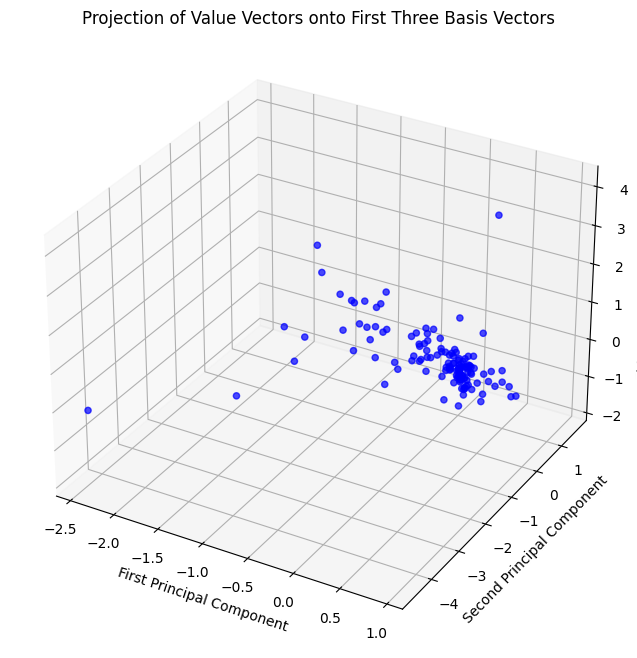

In [42]:
# Project value vectors onto the first three basis vectors
projections = np.dot(V_centered, basis_vectors[:, :k])  # Shape: [N, k]

# Extract the coordinates
x = projections[:, 0]
y = projections[:, 1]
z = projections[:, 2]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='b', marker='o', alpha=0.7)

ax.set_title('Projection of Value Vectors onto First Three Basis Vectors')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

plt.savefig('3d_plot.png', dpi=300, bbox_inches='tight')

plt.show()

<h5> Creating Heatmaps of Basis Vectors </h5>

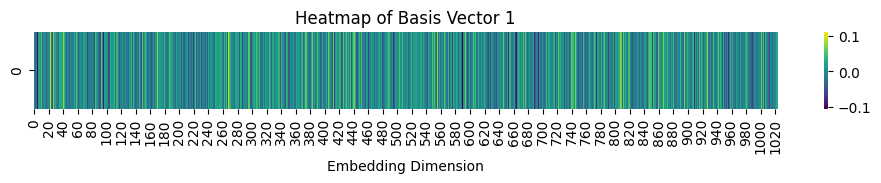

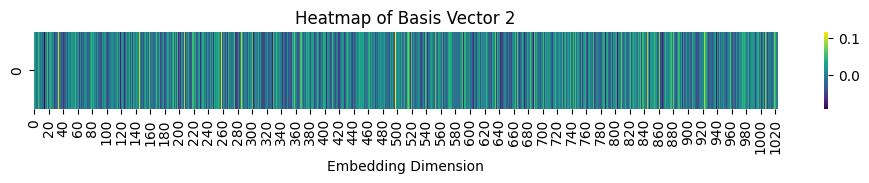

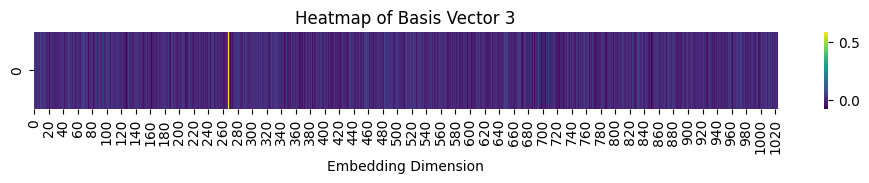

In [48]:
selected_basis_vectors = basis_vectors[:, :k]  # Shape: [d_model, k]
# Transpose for heatmap plotting
selected_basis_vectors_T = selected_basis_vectors.T  # Shape: [k, d_model]

for i in range(k):
    plt.figure(figsize=(12, 1))
    sns.heatmap([selected_basis_vectors_T[i]], cmap='viridis', cbar=True)
    plt.title(f'Heatmap of Basis Vector {i+1}')
    plt.xlabel('Embedding Dimension')
    plt.ylabel('')
    plt.savefig('basis_heatmap.png')
    plt.show()

<h5> Visualizing Tokens in the Basis Vector Space </h5>

In [58]:
# Define tokens of interest (e.g., top tokens from previous step)
tokens_of_interest = ['hi']

# Get token IDs
token_ids = tokenizer.convert_tokens_to_ids(tokens_of_interest)

# Get token embeddings from the embedding matrix
# Embedding matrix E: maps from vocabulary size to d_model
E = model.base_model.W_E  # Shape: [vocab_size, d_model]

# Get embeddings for the tokens
token_embeddings = E[token_ids]  # Shape: [num_tokens, d_model]

In [59]:
# Project token embeddings onto the first three basis vectors
token_projections = np.dot(token_embeddings.cpu().numpy(), basis_vectors[:, :k])  # Shape: [num_tokens, k]

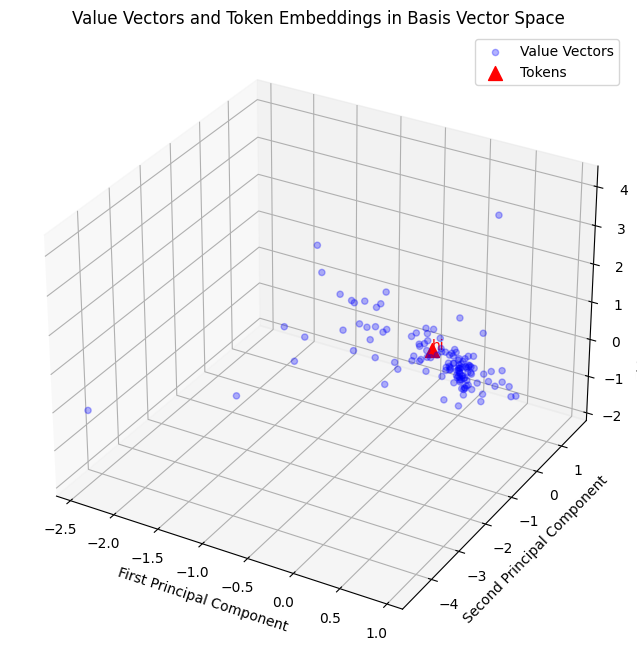

In [60]:
# Coordinates
x_tokens = token_projections[:, 0]
y_tokens = token_projections[:, 1]
z_tokens = token_projections[:, 2]

# Plot tokens
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot value vectors projections
ax.scatter(x, y, z, c='b', marker='o', alpha=0.3, label='Value Vectors')

# Plot token embeddings projections
ax.scatter(x_tokens, y_tokens, z_tokens, c='r', marker='^', s=100, label='Tokens')

# Annotate tokens
for i, token in enumerate(tokens_of_interest):
    ax.text(x_tokens[i], y_tokens[i], z_tokens[i], token, color='red')

ax.set_title('Value Vectors and Token Embeddings in Basis Vector Space')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.legend()

plt.show()

In [61]:
### Experimenting Plotly
!pip install plotly

In [62]:
import plotly.graph_objs as go
import plotly.io as pio

# Coordinates for value vectors
trace_value_vectors = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.7
    ),
    name='Value Vectors'
)

# Coordinates for tokens (if applicable)
trace_tokens = go.Scatter3d(
    x=x_tokens,
    y=y_tokens,
    z=z_tokens,
    mode='markers+text',
    marker=dict(
        size=7,
        color='red',
        opacity=1.0
    ),
    text=tokens_of_interest,
    textposition='top center',
    name='Tokens'
)

data = [trace_value_vectors, trace_tokens]

layout = go.Layout(
    title='Value Vectors and Token Embeddings in Basis Vector Space',
    scene=dict(
        xaxis_title='First Principal Component',
        yaxis_title='Second Principal Component',
        zaxis_title='Third Principal Component'
    ),
    legend=dict(x=0.7, y=0.9)
)

fig = go.Figure(data=data, layout=layout)


In [63]:
# Save the plot to an HTML file
pio.write_html(fig, file='interactive_3d_plot.html', auto_open=False)
